In [1]:
library(ggplot2)

In [2]:
# get cells not included
idx1 = read.csv("data/cellidx_LH.csv")[,1]
path1 = '/gladstone/engelhardt/pelka-collaboration/HuColonCa-FFPE-ImmuOnco-LH_VMSC02001_20220427/HuColonCa-FFPE-ImmuOnco-LH_VMSC02001_20220427/cellpose_cell_by_gene_goodgenes_noblanks.csv'
count = read.csv(path1, row.names = 1)
genes = colnames(count)

In [3]:
count = count[idx1,]

In [4]:
# location
path2 = '/gladstone/engelhardt/pelka-collaboration/HuColonCa-FFPE-ImmuOnco-LH_VMSC02001_20220427/HuColonCa-FFPE-ImmuOnco-LH_VMSC02001_20220427/cellpose_cell_metadata.csv'
metadata = read.csv(path2, row.names = 1)

location = metadata[,c('center_x','center_y')]
location = as.matrix(location)

location = location[idx1,]


In [5]:
# load("modelssaved/cellpose_f20_s5K_l500.RData")
load("modelssaved/three_sample_f20_s5K_l300_norm_i1000.RData")

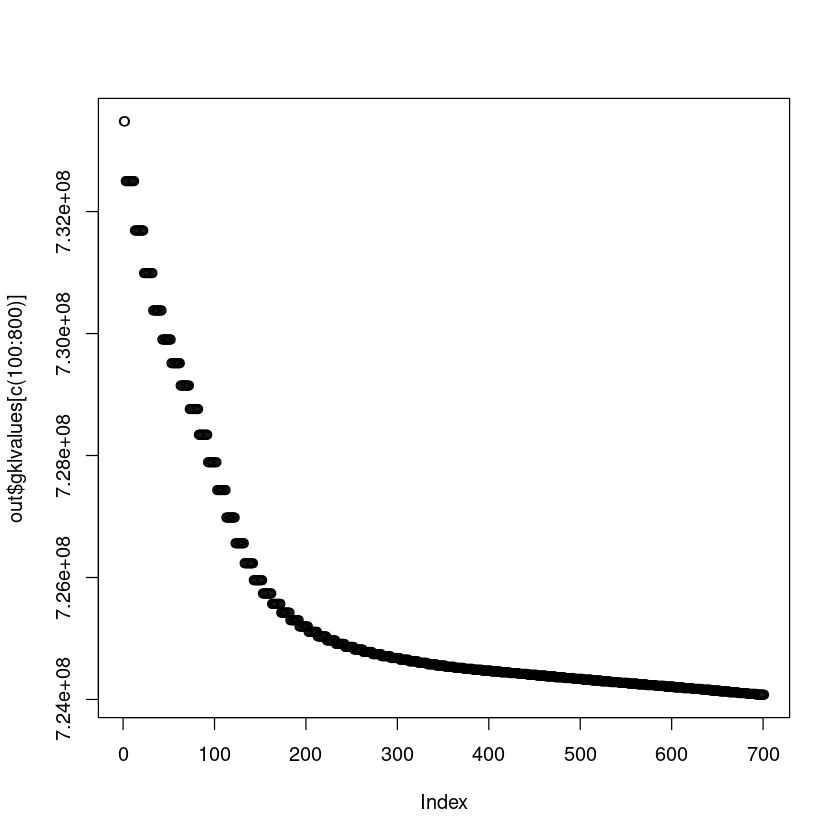

In [6]:
plot(out$gklvalues[c(100:800)])

In [7]:
exp_norm = out$exposures[1:sum(idx1),]/rowSums(out$exposures[1:sum(idx1),])
cluster = apply(exp_norm,1,which.max)

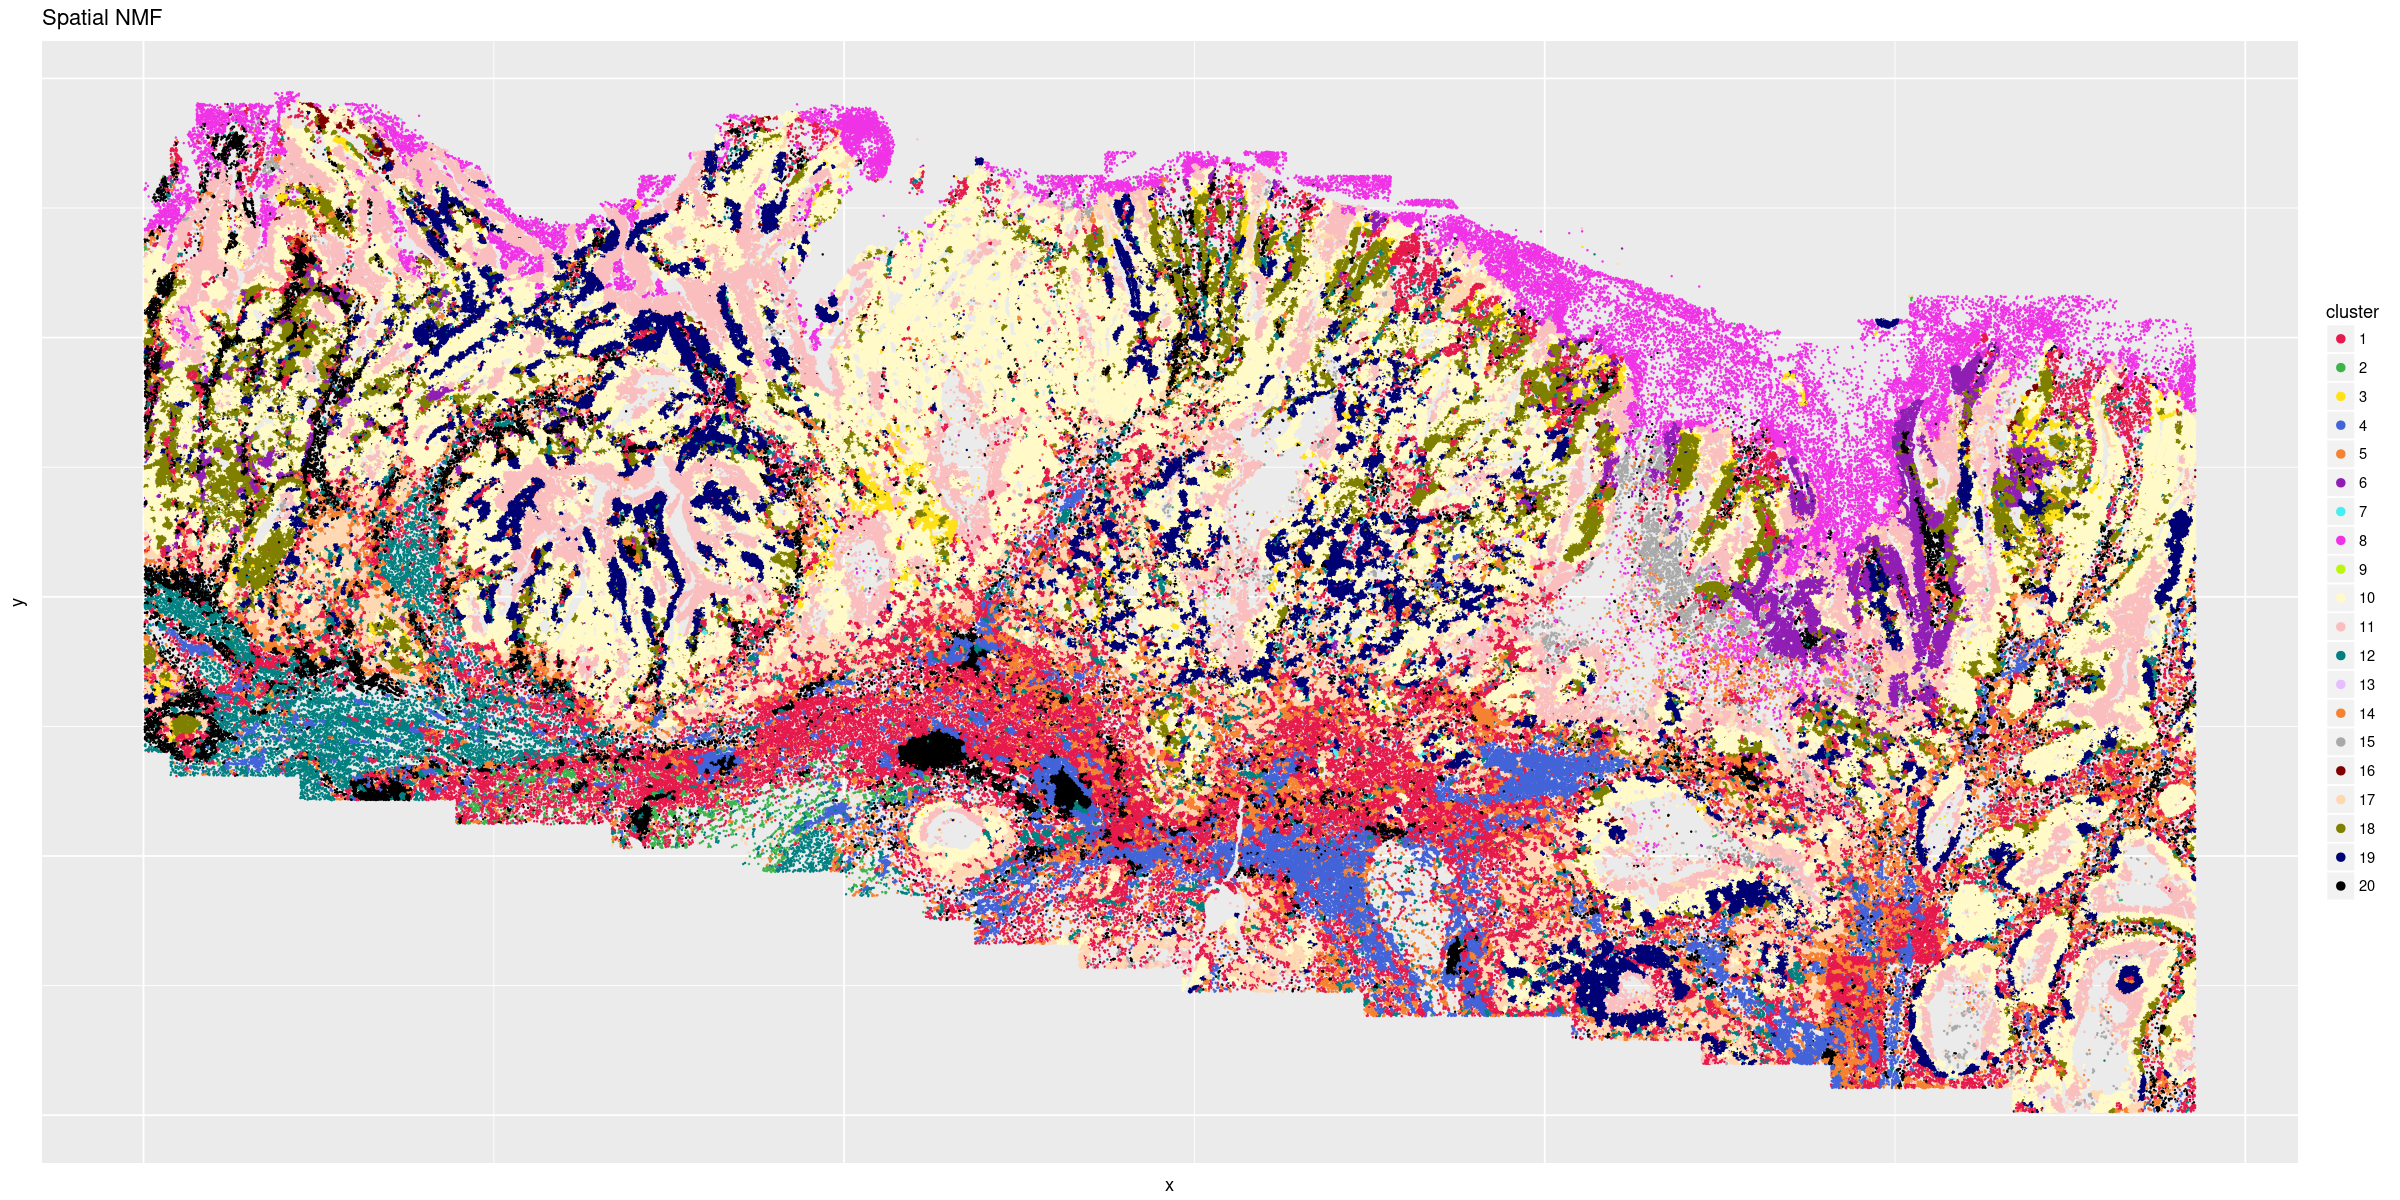

In [8]:
library(ggplot2)
myCol = c('#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fffac8','#fabebe', '#008080', '#e6beff', "#f58231","#a9a9a9", '#800000','#ffd8b1', '#808000','#000075', '#000000', '#2e8b57', '#8b0000', '#808000','#483d8b','#8b008b')
# norm l300
# names_cluster = c("1_Stroma", "2_FosJun","3_Epi","4_B_Plasma","5_inflam","6_antiTumo","7_Epi","8_inflam","9_Epi_St","10_Epi","11_Epi_VE","12_Smoot","13_Epi?_KI","14_Macro","15_SPP1_t","16_glycoly","17_Epi?invs","18_prolif","19_Epi","20_Tcell")
# l300
# names_cluster = c("1_Epi","2_Epi","3_MUC2_DC","4_VEGFA_E","5_prolifer","6_Vessels","7_FosJun","8_EpiInvasi","9_glycoly","10_AntiTum","11_EpiSte","12_Spi","13_infla","14_prolife","15_TGFBI_N","16_B_Plasm","17_CLCA1_","18_T_Imm","19_EpiInfla","20_Smoot")

cluster_dat = data.frame(x = location[,1], y = -location[,2], cluster = as.factor(cluster))
# levels(cluster_dat$cluster) = names_cluster
options(repr.plot.width=20, repr.plot.height=10)
ggplot(cluster_dat, aes(x = x, y = y, col = cluster))+
geom_point(cex = 0.05)+
scale_color_manual(values=myCol[c(1:20)])+
guides(color = guide_legend(override.aes = list(size = 2)))+
theme(axis.text = element_blank(), axis.ticks = element_blank())+
ggtitle("Spatial NMF")

In [5]:
# Weighting genes
dat = t(out$signatures)
dat_new=NULL
for(ii in 1:nrow(dat)){
  rr=dat[ii,]
  m1=max(rr)
  m2=max(rr[-which(rr==m1)])
  mm=rep(m1, length(rr))
  
  mm[which(rr==m1)]=m2
  # ns=rr/mm
  ns=rr*log((rr+1e-10)/(mm+1e-10))
  dat_new=rbind(dat_new, ns)
}

weight_topgene = NULL
ng = 18
for(topic in 1:ncol(dat)){
    idx = order(dat_new[,topic], decreasing = T)
    weighting = genes[idx[1:ng]]

    weight_topgene = rbind(weight_topgene,c(topic,weighting))

}

weight_topgene

ERROR: Error in eval(expr, envir, enclos): object 'genes' not found
